<a href="https://colab.research.google.com/github/xahinds2/MachineLearning/blob/main/Predict_fuel_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q seaborn

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

In [4]:
raw_datasets = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [5]:
dataset = raw_datasets.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


In [11]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [12]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.173469,0.201531,0.625000
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.379136,0.401656,0.484742
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [13]:
train_ds = dataset.sample(frac=0.8, random_state=0)
test_ds = dataset.drop(train_ds.index)

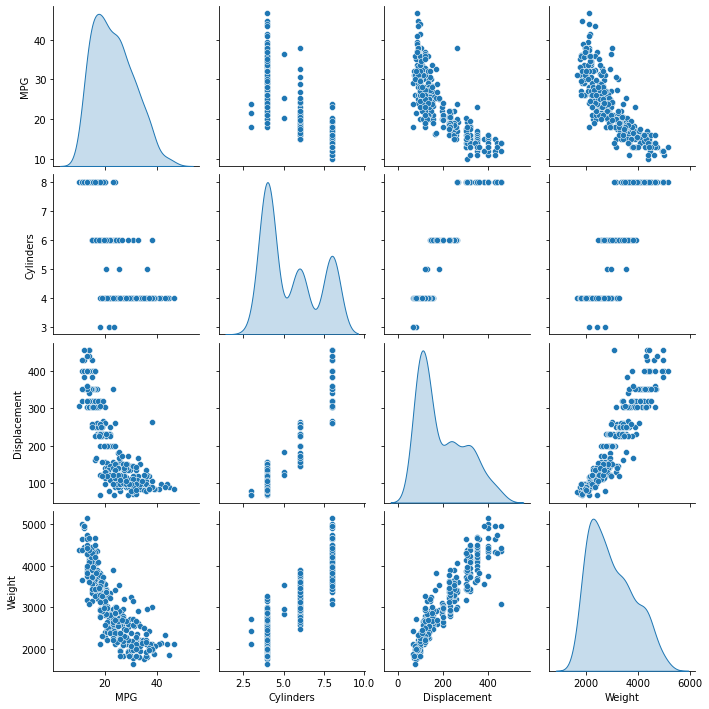

In [14]:
sns.pairplot(train_ds[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [15]:
train_ds.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [16]:
train_features = train_ds.copy()
train_labels = train_features.pop('MPG')

test_features = test_ds.copy()
test_labels = test_features.pop('MPG')

In [17]:
train_features.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [18]:
train_labels.head()

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
Name: MPG, dtype: float64

In [19]:
train_features.describe().transpose()[['mean', 'std']]

,mean,std
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [20]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [21]:
first = np.array(train_features[:1])
with np.printoptions(precision = 2, suppress=True):
  print(first)
  print(normalizer(first).numpy())

[[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]
[[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [22]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [23]:
horsepower[:10]

array([ 75.,  88., 160.,  63.,  67.,  90.,  60.,  67.,  95.,  88.])

In [24]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    tf.keras.layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [25]:
horsepower_model.predict(horsepower[:10])

array([[-0.021],
       [-0.012],
       [ 0.038],
       [-0.029],
       [-0.026],
       [-0.01 ],
       [-0.031],
       [-0.026],
       [-0.007],
       [-0.012]], dtype=float32)

In [26]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [27]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.76 s, sys: 200 ms, total: 4.96 s
Wall time: 6.19 s


In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.801377,4.187837,95
96,3.804196,4.191680,96
97,3.804895,4.186764,97
98,3.806325,4.208051,98
99,3.802713,4.178157,99


In [29]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

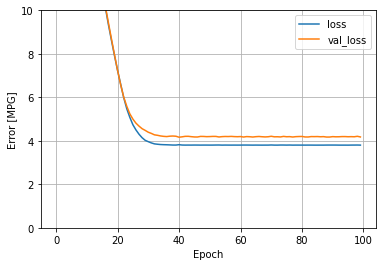

In [30]:
plot_loss(history)

In [31]:
test_results = {}
test_results['Horsepower'] = horsepower_model.evaluate(test_features['Horsepower'], test_labels, verbose=0)

In [32]:
x = tf.linspace(0, 250, 251)
y = horsepower_model.predict(x)

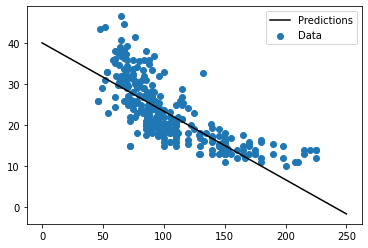

In [33]:
plt.scatter(train_features['Horsepower'], train_labels, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.legend()

In [34]:
linear_model = tf.keras.Sequential([
                                    normalizer,
                                    tf.keras.layers.Dense(units=1)
])

In [35]:
train_features[:10]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,0,1,0
257,6,232.0,90.0,3210.0,17.2,78,0,0,1
310,4,89.0,60.0,1968.0,18.8,80,0,1,0
328,4,146.0,67.0,3250.0,21.8,80,1,0,0
125,6,198.0,95.0,3102.0,16.5,74,0,0,1
108,4,97.0,88.0,2279.0,19.0,73,0,1,0


In [36]:
linear_model.predict(train_features[:10])

array([[ 0.132],
       [-1.279],
       [ 0.858],
       [-0.992],
       [-0.765],
       [-0.486],
       [-0.775],
       [-1.763],
       [ 0.126],
       [-0.004]], dtype=float32)

In [37]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.417],
       [ 0.365],
       [-0.143],
       [-0.463],
       [-0.368],
       [-0.548],
       [ 0.238],
       [ 0.271],
       [ 0.128]], dtype=float32)>

In [38]:
linear_model.compile(
                optimizer = tf.optimizers.Adam(learning_rate=0.1),
                loss='mean_absolute_error'
)

In [39]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.58 s, sys: 192 ms, total: 5.77 s
Wall time: 8.89 s


In [40]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,2.486891,2.481014,95
96,2.489877,2.454224,96
97,2.469798,2.478636,97
98,2.490050,2.465776,98
99,2.482224,2.496495,99


In [41]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

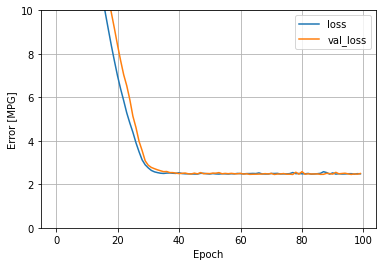

In [42]:
plot_loss(history)

In [43]:
test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose=0)

In [44]:
def build_and_compile(norm):
  model = tf.keras.Sequential([
                               norm,
                               tf.keras.layers.Dense(64, activation = 'relu'),
                               tf.keras.layers.Dense(64, activation = 'relu'),
                               tf.keras.layers.Dense(1)
  ])

  model.compile(
      loss = 'mae',
      optimizer = tf.optimizers.Adam(learning_rate=0.001)
  )

  return model

In [45]:
dnn_horsepower_model = build_and_compile(horsepower_normalizer)
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [46]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.88 s, sys: 217 ms, total: 6.1 s
Wall time: 8.69 s


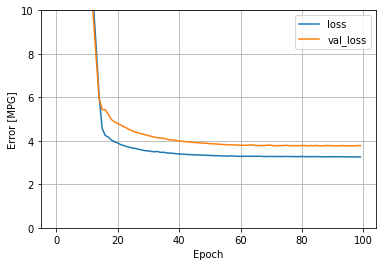

In [47]:
plot_loss(history)

In [48]:
x = tf.linspace(0, 250, 251)
y = dnn_horsepower_model.predict(x)

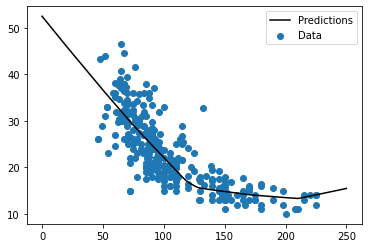

In [49]:
plt.scatter(train_features['Horsepower'], train_labels, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.legend()

In [50]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(test_features['Horsepower'], test_labels, verbose=0)

In [51]:
dnn_model = build_and_compile(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [52]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 6.67 s, sys: 228 ms, total: 6.9 s
Wall time: 10 s


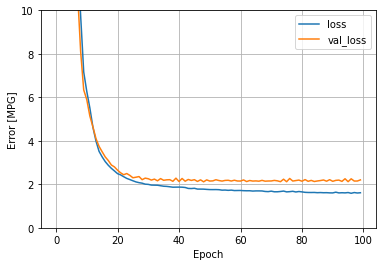

In [53]:
plot_loss(history)

In [54]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [55]:
pd.DataFrame(test_results, index=['mean [MPG]']).T

,mean [MPG]
Horsepower,3.642724
linear_model,2.538567
dnn_horsepower_model,2.889628
dnn_model,1.760707


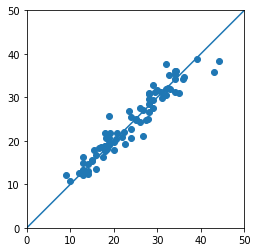

In [56]:
test_predictions = dnn_model.predict(test_features).flatten()

plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
lims = [0, 50]
plt.ylim(lims)
plt.xlim(lims)
plt.plot(lims, lims)

(array([ 1.,  0.,  1.,  1.,  0.,  0.,  1.,  3.,  3.,  2.,  9.,  4.,  8.,
        11.,  9.,  6.,  6.,  4.,  4.,  1.,  2.,  0.,  0.,  1.,  1.]),
 array([-7.377, -6.815, -6.254, -5.693, -5.131, -4.57 , -4.008, -3.447,
        -2.886, -2.324, -1.763, -1.202, -0.64 , -0.079,  0.482,  1.044,
         1.605,  2.167,  2.728,  3.289,  3.851,  4.412,  4.973,  5.535,
         6.096,  6.658]),
 <a list of 25 Patch objects>)

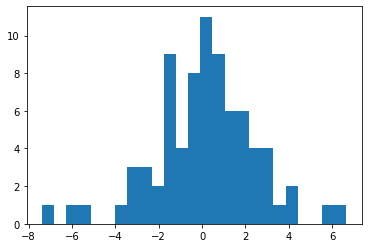

In [57]:
error = test_predictions-test_labels
plt.hist(error, bins=25)

In [58]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [59]:
saved_model = tf.keras.models.load_model('dnn_model')
test_results['saved_model'] = saved_model.evaluate(test_features, test_labels, verbose=0)

In [60]:
pd.DataFrame(test_results, index = ['MPG']).T

,MPG
Horsepower,3.642724
linear_model,2.538567
dnn_horsepower_model,2.889628
dnn_model,1.760707
saved_model,1.760707
